# WeatherPy
----

### Analysis
* There seems to be a meaningful trend that cities closest to the equator tend to have higher max temps than cities further away on either side.
* Generally cities closer to the equator tend to have similar humidity %s as cities further away on either side of the equator.
* There also seems to be no relationship between cloudiness and proximity to the equator
* Finally, it looks like there might be a relationship between wind speed and proximity to the equator. It seems cities further away from the equator (on both sides) tend to have higher wind speeds than cities on or close to the equator.


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&q="

# Set up lists to hold reponse info
cityname = []
country = []
cloud = []
date =[]
humid = []
lat = []
lng = []
temp = []
wind = []

record = 1
group = 1

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    print("Processing Record " + str(record) +  " of set " + str(group) + " | " + city)
    try:
        response = requests.get(url + city).json()
        cityname.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except: 
        print("City not found. Skipping...")
    
    # API only allows 60 requests per minute. Need to create a pause in the API calls to allow for my requests.
    if record == 59:
        time.sleep(61)
        record = 1
        group += 1
    record += 1
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | barrow
Processing Record 2 of set 1 | bosaso
Processing Record 3 of set 1 | bethel
Processing Record 4 of set 1 | hofn
Processing Record 5 of set 1 | tasiilaq
Processing Record 6 of set 1 | carnarvon
Processing Record 7 of set 1 | ushuaia
Processing Record 8 of set 1 | sauda
Processing Record 9 of set 1 | kaihua
Processing Record 10 of set 1 | lebu
Processing Record 11 of set 1 | talara
Processing Record 12 of set 1 | aswan
Processing Record 13 of set 1 | saint-philippe
Processing Record 14 of set 1 | port elizabeth
Processing Record 15 of set 1 | kolpny
Processing Record 16 of set 1 | jamestown
Processing Record 17 of set 1 | mahebourg
Processing Record 18 of set 1 | new norfolk
Processing Record 19 of set 1 | labrea
City not found. Skipping...
Processing Record 20 of set 1 | qaanaaq
Processing Record 21 of set 1 | hithadhoo
Processing Record 22 of set 1 | kapaa
Processing Record 23 of set 1 | mataur

Processing Record 12 of set 4 | uyuni
Processing Record 13 of set 4 | celestun
Processing Record 14 of set 4 | bandar penggaram
City not found. Skipping...
Processing Record 15 of set 4 | santa cruz
Processing Record 16 of set 4 | meyungs
City not found. Skipping...
Processing Record 17 of set 4 | faanui
Processing Record 18 of set 4 | codrington
Processing Record 19 of set 4 | barinas
Processing Record 20 of set 4 | shenjiamen
Processing Record 21 of set 4 | batsfjord
Processing Record 22 of set 4 | plotnikovo
Processing Record 23 of set 4 | sabang
Processing Record 24 of set 4 | la palma
Processing Record 25 of set 4 | newport
Processing Record 26 of set 4 | ibirama
Processing Record 27 of set 4 | khandyga
Processing Record 28 of set 4 | bud
Processing Record 29 of set 4 | klaksvik
Processing Record 30 of set 4 | touros
Processing Record 31 of set 4 | taiobeiras
Processing Record 32 of set 4 | eenhana
Processing Record 33 of set 4 | jiddah
City not found. Skipping...
Processing Recor

Processing Record 23 of set 7 | port moresby
Processing Record 24 of set 7 | ondarroa
Processing Record 25 of set 7 | miraflores
Processing Record 26 of set 7 | morant bay
Processing Record 27 of set 7 | odweyne
City not found. Skipping...
Processing Record 28 of set 7 | newcastle
Processing Record 29 of set 7 | luanda
Processing Record 30 of set 7 | bababe
City not found. Skipping...
Processing Record 31 of set 7 | acandi
Processing Record 32 of set 7 | takhli
Processing Record 33 of set 7 | silifke
Processing Record 34 of set 7 | maarianhamina
City not found. Skipping...
Processing Record 35 of set 7 | goundam
Processing Record 36 of set 7 | gimli
Processing Record 37 of set 7 | broken hill
Processing Record 38 of set 7 | puerto colombia
Processing Record 39 of set 7 | abnub
Processing Record 40 of set 7 | samarai
Processing Record 41 of set 7 | north bend
Processing Record 42 of set 7 | grand river south east
City not found. Skipping...
Processing Record 43 of set 7 | altamira
Proce

City not found. Skipping...
Processing Record 36 of set 10 | yaritagua
Processing Record 37 of set 10 | zhigansk
Processing Record 38 of set 10 | nouadhibou
Processing Record 39 of set 10 | bonfim
Processing Record 40 of set 10 | amga
Processing Record 41 of set 10 | exeter
Processing Record 42 of set 10 | athabasca
Processing Record 43 of set 10 | huarmey
Processing Record 44 of set 10 | ixtapa
Processing Record 45 of set 10 | nuuk
Processing Record 46 of set 10 | houma
Processing Record 47 of set 10 | sisimiut
Processing Record 48 of set 10 | coyuca
City not found. Skipping...
Processing Record 49 of set 10 | alexandria
Processing Record 50 of set 10 | statesboro
Processing Record 51 of set 10 | lekoni
Processing Record 52 of set 10 | bathsheba
Processing Record 53 of set 10 | evensk
Processing Record 54 of set 10 | isangel
Processing Record 55 of set 10 | tidore
City not found. Skipping...
Processing Record 56 of set 10 | las cruces
Processing Record 57 of set 10 | moa
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
raw_data_dict = {
    "City": cityname,
    "Country": country,
    "Date": date,
    "Cloudiness": cloud,
    "Humidity": humid,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": temp,
    "Wind Speed": wind}

weather_df = pd.DataFrame(raw_data_dict)
weather_df.head()

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Barrow,AR,1553028297,0,60,-38.31,-60.23,289.806,5.76
1,Bosaso,SO,1553028297,0,100,11.28,49.18,298.656,2.26
2,Bethel,US,1553025360,1,78,60.79,-161.76,261.150,4.60
3,Hofn,IS,1553028030,8,98,64.25,-15.21,277.757,12.76
4,Tasiilaq,GL,1553025000,75,66,65.61,-37.64,262.150,6.20


In [25]:
weather_df.to_csv(output_data_file)
weather_df.describe()

,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,5.320000e+02,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,1.553028e+09,35.530075,73.325188,18.373609,14.012312,287.168171,3.559192
std,1.362838e+03,32.907063,26.541257,33.574632,87.418493,14.302242,2.624284
min,1.553023e+09,0.000000,6.000000,-54.810000,-173.230000,236.057000,0.310000
25%,1.553027e+09,1.000000,57.000000,-8.072500,-66.490000,279.847750,1.500000
50%,1.553028e+09,24.000000,78.000000,19.825000,16.350000,290.993000,2.935000
75%,1.553029e+09,75.000000,91.000000,47.695000,82.215000,298.150000,5.010000
max,1.553029e+09,100.000000,319.000000,78.220000,179.320000,309.150000,20.100000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

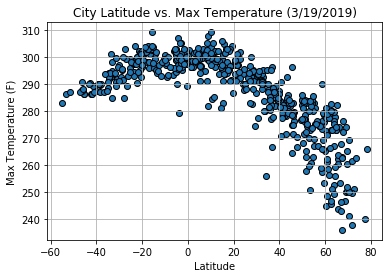

In [26]:
# Build the scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o",edgecolors = 'black')


# Add titles and a grid
plt.title(f"City Latitude vs. Max Temperature (3/19/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image
plt.savefig("latitude_vs_temp.png")

# Show image
plt.show()

#### Latitude vs. Humidity Plot

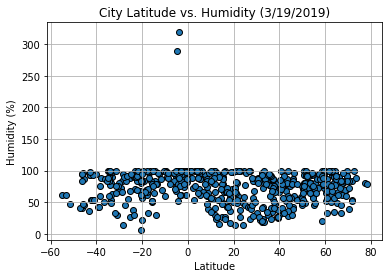

In [27]:
# Build the scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o",edgecolors = 'black')

# Add titles and a grid
plt.title(f"City Latitude vs. Humidity (3/19/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image
plt.savefig("latitude_vs_humidty.png")

# Show image
plt.show()

#### Latitude vs. Cloudiness Plot

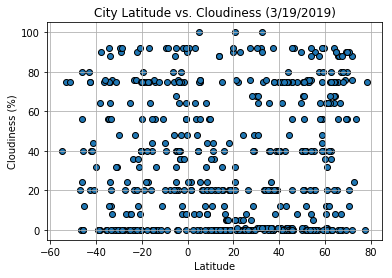

In [28]:
# Build the scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o",edgecolors = 'black')

# Add titles and a grid
plt.title(f"City Latitude vs. Cloudiness (3/19/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image
plt.savefig("latitude_vs_cloudiness.png")

# Show image
plt.show()

#### Latitude vs. Wind Speed Plot

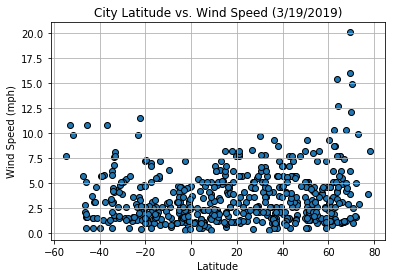

In [29]:
# Build the scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o",edgecolors = 'black')

# Add titles and a grid
plt.title(f"City Latitude vs. Wind Speed (3/19/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image
plt.savefig("latitude_vs_windspeed.png")

# Show image
plt.show()